EXPLORATORY DATA ANALYSIS

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("dataset\insurance.csv")

In [64]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [65]:
pd.set_option("display.float_format","{:.2f}".format)


#Important thing to remember
#The actual values are NOT changed
#Only how they look on screen is changed

In [7]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [66]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

#It does NOT change your data — only how charts look.


In [67]:
# Checking for duplicated rows

df.duplicated().sum()

np.int64(0)

In [68]:
# checking for missing values

df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [69]:
# just 8 so i can drop the rows 

df.dropna(inplace = True)

In [70]:
df.shape

# now i will have 1332 rows 

(1332, 10)

In [71]:
df.describe()

# claims vary massivley as we can see in std

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


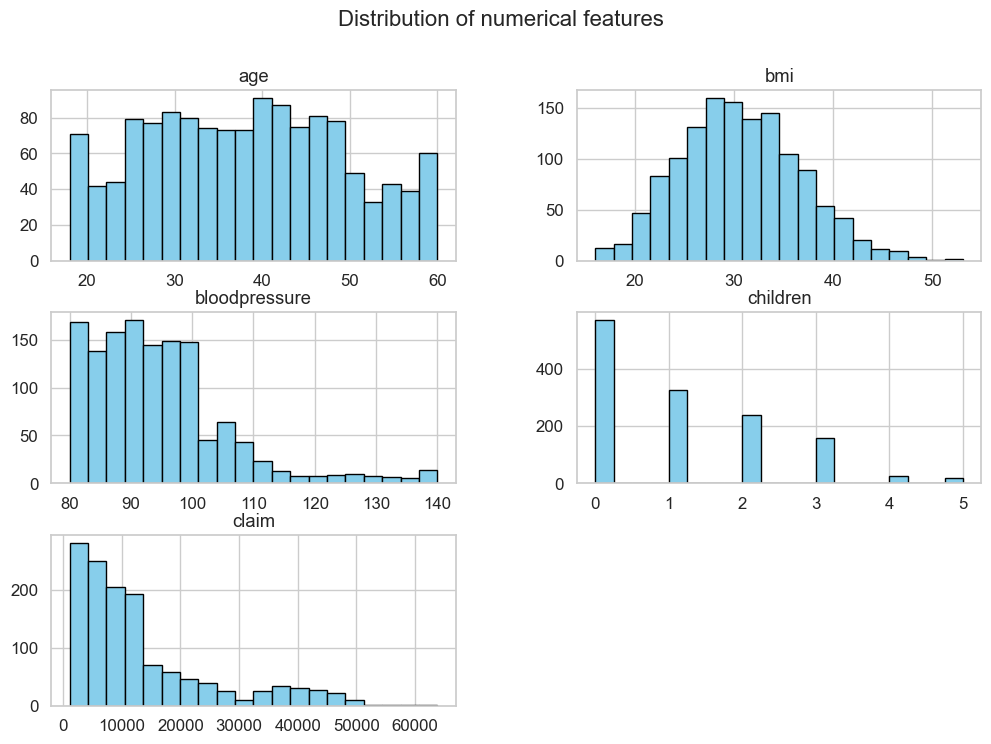

In [72]:
numeric_cols = ["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8), color = "skyblue", edgecolor = "black")
plt.suptitle("Distribution of numerical features", fontsize= 16)
plt.show()

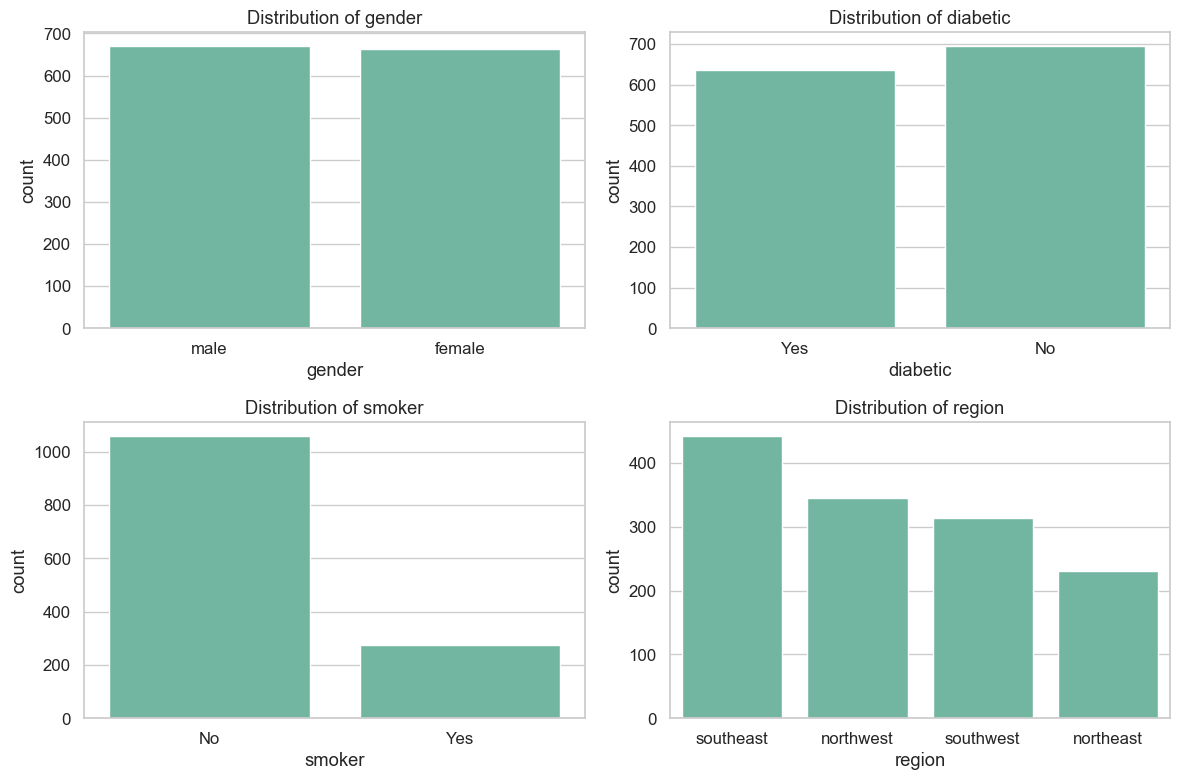

In [73]:
cat_cols = ["gender", "diabetic", "smoker", "region"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)          # ← USE i here
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [74]:
# seeing how calim varies with smoker region and various factors

df.groupby(["gender","smoker"])["claim"].mean()

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

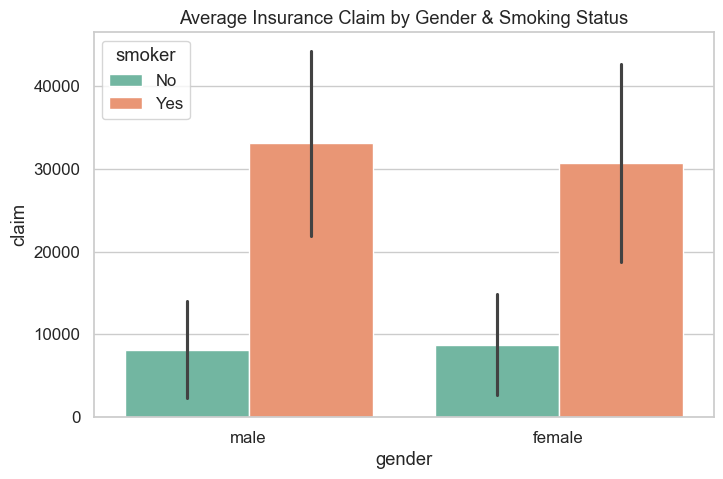

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x = "gender", y= "claim", hue = "smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [76]:
pivot_region_dibetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [77]:
pivot_region_dibetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


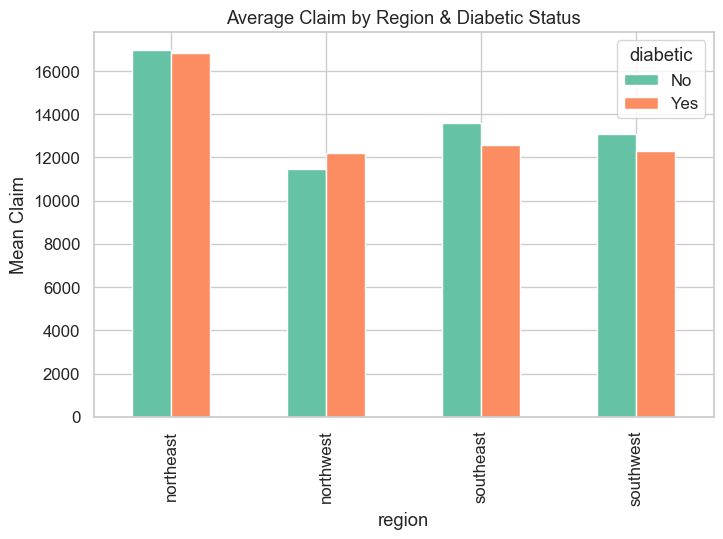

In [78]:
pivot_region_dibetic.plot(kind="bar", figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [79]:
pivot_table = pd.pivot_table(df, values = "claim", index = "region", columns = "smoker", aggfunc = "mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [80]:
pivot_table = pd.pivot_table(df, values = "claim", index = "children", columns = "diabetic", aggfunc= "mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [81]:
# correlation heatmap

numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

In [82]:
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


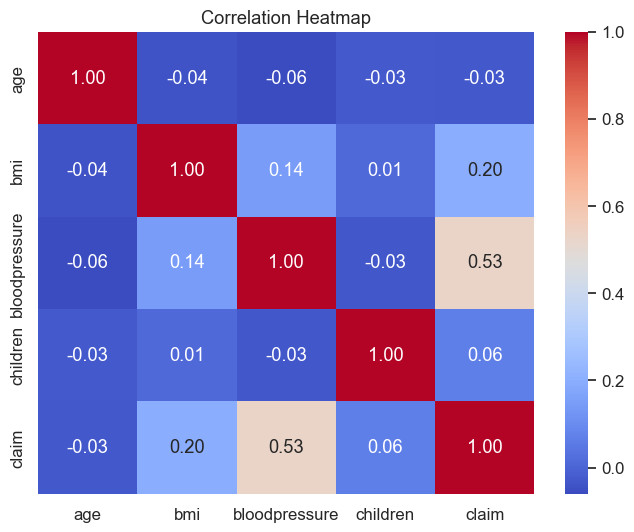

In [83]:
# better visuals
# it seems in num cols only blood pressure is mostly correlated with claim
plt.figure(figsize=(8,6))

sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()


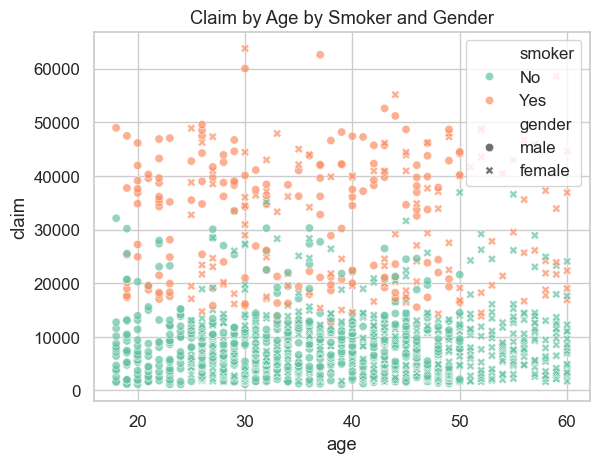

In [84]:
# relation ship analysis

sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style= "gender", alpha = 0.7)
plt.title("Claim by Age by Smoker and Gender")
plt.show()

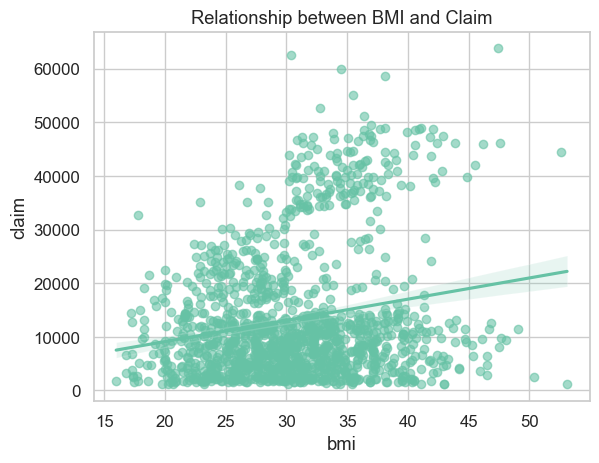

In [85]:
sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws = {"alpha":0.6})
plt.title("Relationship between BMI and Claim")
plt.show()

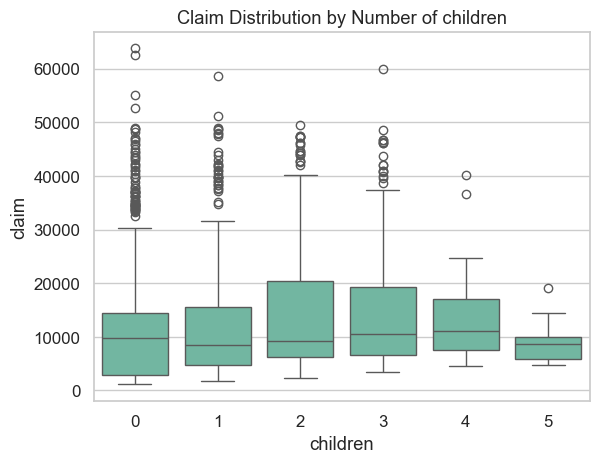

In [86]:
sns.boxplot(data = df, x = "children", y = "claim")
plt.title("Claim Distribution by Number of children")
plt.show()

In [87]:
# NOW LETS INSTEAD OF TREATING AGES CONTINUOUS LETS CREATE AGE BANDS

df["age_group"] = pd.cut(df["age"],bins = [0,18,30,45,60,100], labels=["<18", "18-30", "31-45", "46-60", "60<"] )
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [88]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60<        0
Name: count, dtype: int64

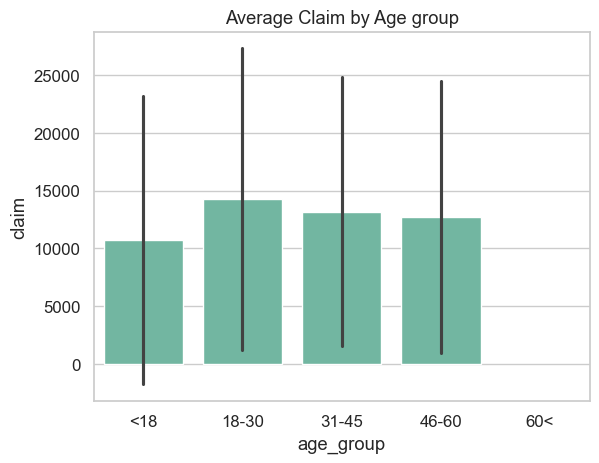

In [89]:
sns.barplot(data = df, x="age_group", y = "claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age group")
plt.show()

In [90]:
df["bmi_category"] = pd.cut(df["bmi"], bins = [0, 18.5, 24.9, 29.9, 100], labels= ["Underweight", "Normal", "Overweight", "Obese"])


In [91]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

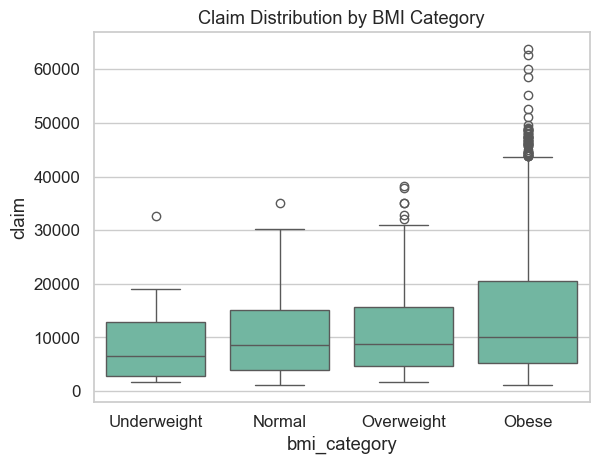

In [92]:
sns.boxplot(data = df, x = "bmi_category", y = "claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

In [93]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [94]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


DATA PREPROCESSING & FEATURE ENGINEERING 

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [96]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [97]:
X = df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker"]]
y = df["claim"]

In [98]:
X


,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [109]:
cat_colms = ["gender", "diabetic", "smoker"]
label_encoders = {}

In [110]:

for col in cat_cols:

    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    joblib.dump(le, f"label_encoder_{col}.pkl")


C:\Users\hanif\AppData\Local\Temp\ipykernel_896\1750921083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\hanif\AppData\Local\Temp\ipykernel_896\1750921083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\hanif\AppData\Local\Temp\ipykernel_896\1750921083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [111]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [112]:
X.dtypes

age              float64
gender             int64
bmi              float64
bloodpressure      int64
diabetic           int64
children           int64
smoker             int64
dtype: object

In [106]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [116]:
# Splitting data INTO TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [117]:
X_train.dtypes

age              float64
gender             int64
bmi              float64
bloodpressure      int64
diabetic           int64
children           int64
smoker             int64
dtype: object

In [118]:
# SCALING NUMERICAL FEATURES
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [119]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [120]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [121]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1065, 7) (1065,)
(267, 7) (267,)


TRAINING MACHINE LEARNING MODELS

we will do parameter tuning for all the models

In [122]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # some realionships aren't straight , helps linear reg fit curves
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score   #Cross-validation tests the model multiple times using different splits and then averages the result.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [123]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
    return{"R2" : r2, "MAE" : mae, "RMSE" : rmse}

In [124]:
results = {}

In [125]:
# LINEAR REGRESSION

lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

# POLY LINEAR REGRESSION

best_poly_model = None
best_poly_score = -np.inf
for degree in [2,3]:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:

        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomail Regression (deg ={degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test )

print("Polynomial Regression models are trained")

# Random Forest

rf = RandomForestRegressor()

rf_params = {
    "n_estimators" : [100, 200],
    "max_depth" : [None, 10, 20],
    "min_samples_split" : [2,5],
    "min_samples_leaf" : [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv = 3, scoring = "r2", n_jobs = -1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest training is completed, best parameters", rf_grid.best_params_)

# SUPPORT VECTOR REGRESSOR (SVR)

svr = SVR()

svr_params = {
    "kernel" : ["rbf", "poly", "linear"],
    "C" : [1, 10, 50],
    "epsilon" : [0.1, 0.2, 0.5],
    "degree" : [2, 3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring="r2", n_jobs= -1, verbose=0)
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_

results["SVR"] = evaluate_model(best_svr, X_train, X_test, y_train, y_test )

print("SVR training is completed, best parameteres:", svr_grid.best_params_)

# XGBoost


xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    "n_estimators" : [100, 200],
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "subsample" : [0.8, 0.1]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv = 3, scoring = "r2", n_jobs = -1, verbose =0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost training is completed, best parameters:", xgb_grid.best_params_)





Linear Regression model trained
Polynomial Regression models are trained
Random Forest training is completed, best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
SVR training is completed, best parameteres: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed, best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


NOW COMPARING THE RESULTS

In [126]:
results

{'Linear Regression': {'R2': 0.7179472033841503,
  'MAE': 5204.669112306377,
  'RMSE': np.float64(72.14339271413826)},
 'Polynomail Regression (deg =2)': {'R2': 0.8097011452697858,
  'MAE': 4291.979187489449,
  'RMSE': np.float64(65.5131985747105)},
 'Random Forest': {'R2': 0.8282074421333063,
  'MAE': 3994.3971226868493,
  'RMSE': np.float64(63.20124304700699)},
 'SVR': {'R2': 0.4593879090365639,
  'MAE': 6340.820485629257,
  'RMSE': np.float64(79.629269026089)},
 'XGBoost': {'R2': 0.8355115948326296,
  'MAE': 3889.9810110896533,
  'RMSE': np.float64(62.36971228961741)}}

In [127]:
# making results look better

results_df = pd.DataFrame(results).T.sort_values(by= "R2", ascending = False)
results_df

,R2,MAE,RMSE
XGBoost,0.84,3889.98,62.37
Random Forest,0.83,3994.40,63.20
Polynomail Regression (deg =2),0.81,4291.98,65.51
Linear Regression,0.72,5204.67,72.14
SVR,0.46,6340.82,79.63


XGBoost shows best resutls

In [128]:
best_xgb

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [129]:
models = {
    "Linear Regression" : lr,
    "Polynomial Regression" : poly_lr,
    "Random Forest" : best_rf,
    "SVR" : best_svr,
    "XGBoost" : best_xgb
}

In [130]:
best_r2 = results_df["R2"].max()

In [131]:
best_r2

np.float64(0.8355115948326296)

In [132]:
top_model = results_df[results_df["R2"] == best_r2]

In [133]:
top_model

,R2,MAE,RMSE
XGBoost,0.84,3889.98,62.37


In [134]:
best_model = models[top_model.index[0]]

In [136]:
best_model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [137]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
